In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
weather = pd.read_csv('weather.csv')

In [3]:
races.columns

Index(['season', 'round', 'circuit_id', 'lat', 'long', 'country', 'date',
       'url'],
      dtype='object')

In [4]:
print(results.shape)
results.columns

(24167, 13)


Index(['season', 'round', 'circuit_id', 'driver', 'date_of_birth',
       'nationality', 'constructor', 'grid', 'time', 'status', 'points',
       'podium', 'url'],
      dtype='object')

In [5]:
print(qualifying.shape)
qualifying.columns

(14559, 6)


Index(['grid_position', 'driver_name', 'car', 'qualifying_time', 'season',
       'round'],
      dtype='object')

In [6]:

driver_standings.columns

Index(['season', 'round', 'driver', 'driver_points_after_race',
       'driver_wins_after_race', 'driver_standings_pos_after_race',
       'driver_points', 'driver_wins', 'driver_standings_pos'],
      dtype='object')

In [7]:

constructor_standings.columns

Index(['season', 'round', 'constructor', 'constructor_points_after_race',
       'constructor_wins_after_race', 'constructor_standings_pos_after_race',
       'constructor_points', 'constructor_wins', 'constructor_standings_pos'],
      dtype='object')

In [8]:
weather.columns

Index(['season', 'round', 'circuit_id', 'weather', 'weather_warm',
       'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy'],
      dtype='object')

## Exploratory Data analysis

In [9]:
print(races.shape)
races.head()

(1018, 8)


,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


In [10]:
print(results.shape)
results.head()

(24167, 13)


,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,url
0,1950,1,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,1,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2,http://en.wikipedia.org/wiki/1950_British_Gran...
2,1950,1,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3,http://en.wikipedia.org/wiki/1950_British_Gran...
3,1950,1,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4,http://en.wikipedia.org/wiki/1950_British_Gran...
4,1950,1,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5,http://en.wikipedia.org/wiki/1950_British_Gran...


In [11]:
print(qualifying.shape)
qualifying.rename(columns = {'grid_position': 'grid'}, inplace = True)
qualifying.head()

(14559, 6)


,grid,driver_name,car,qualifying_time,season,round
0,1,Keke Rosberg ROS,Williams Honda,1:34.526,1983,1
1,2,Alain Prost PRO,Renault,1:34.672,1983,1
2,3,Patrick Tambay TAM,Ferrari,1:34.758,1983,1
3,4,Nelson Piquet PIQ,Brabham BMW,1:35.114,1983,1
4,5,Derek Warwick WAR,Toleman Hart,1:35.206,1983,1


**Palaces and countries that held grand prix**

In [12]:
import folium
import pandas as pd

map = folium.Map(location=[48, 11], zoom_start=3)
for index, row in races.iterrows():
    folium.Marker([row['lat'], row['long']], popup=row['country']).add_to(map)

map

**Number of Races held each season since 1950**

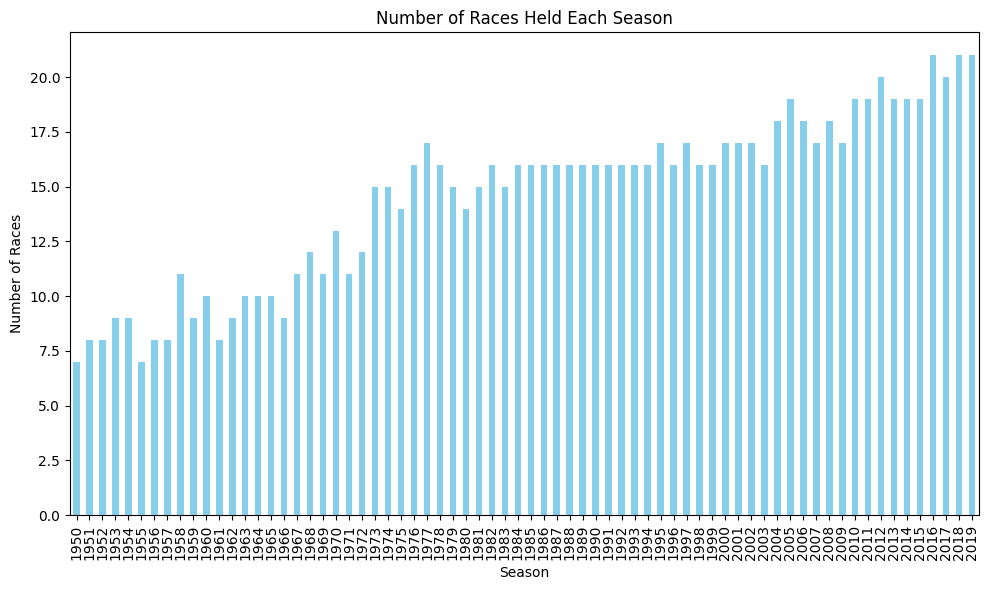

In [13]:
race_counts = results.groupby('season')['round'].nunique()
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.title('Number of Races Held Each Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [14]:
driver_standings.drop(['driver_points_after_race', 'driver_wins_after_race', 'driver_standings_pos_after_race'] ,axis = 1, inplace = True)

print(driver_standings.shape)
driver_standings.head()

(26264, 6)


,season,round,driver,driver_points,driver_wins,driver_standings_pos
0,1950,1,farina,0.0,0.0,0.0
1,1950,1,fagioli,0.0,0.0,0.0
2,1950,1,reg_parnell,0.0,0.0,0.0
3,1950,1,cabantous,0.0,0.0,0.0
4,1950,1,rosier,0.0,0.0,0.0


In [15]:
constructor_standings.drop(['constructor_points_after_race', 'constructor_wins_after_race','constructor_standings_pos_after_race' ],axis = 1, inplace = True)

print(constructor_standings.shape)
constructor_standings.head()

(12316, 6)


,season,round,constructor,constructor_points,constructor_wins,constructor_standings_pos
0,1958,1,cooper,0.0,0.0,0.0
1,1958,1,ferrari,0.0,0.0,0.0
2,1958,1,maserati,0.0,0.0,0.0
3,1958,2,cooper,8.0,1.0,1.0
4,1958,2,ferrari,6.0,0.0,2.0


In [16]:
constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     12316 non-null  int64  
 1   round                      12316 non-null  int64  
 2   constructor                12316 non-null  object 
 3   constructor_points         12316 non-null  float64
 4   constructor_wins           12316 non-null  float64
 5   constructor_standings_pos  12316 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 577.4+ KB


**Top constructor standings per season**

In [17]:
top_standing_positions = constructor_standings[constructor_standings['constructor_standings_pos'] != 0]
top_standing_positions = top_standing_positions.sort_values(by='constructor_standings_pos')
top_constructor_per_season = top_standing_positions.groupby('season').first().reset_index()

top_constructor_per_season.head()

,season,round,constructor,constructor_points,constructor_wins,constructor_standings_pos
0,1958,2,cooper,8.0,1.0,1.0
1,1959,8,cooper-climax,34.0,3.0,1.0
2,1960,2,cooper-climax,8.0,1.0,1.0
3,1961,4,ferrari,24.0,2.0,1.0
4,1962,8,brm,37.0,3.0,1.0


**Constructor with most number of Points** 

In [18]:

most_constructor_points_per_season = top_constructor_per_season.sort_values(by="constructor_points", ascending=False)
most_constructor_points_per_season.head()

,season,round,constructor,constructor_points,constructor_wins,constructor_standings_pos
56,2014,18,mercedes,608.0,14.0,1.0
58,2016,18,mercedes,593.0,15.0,1.0
61,2019,15,mercedes,505.0,10.0,1.0
52,2010,18,red_bull,426.0,7.0,1.0
55,2013,13,red_bull,352.0,6.0,1.0


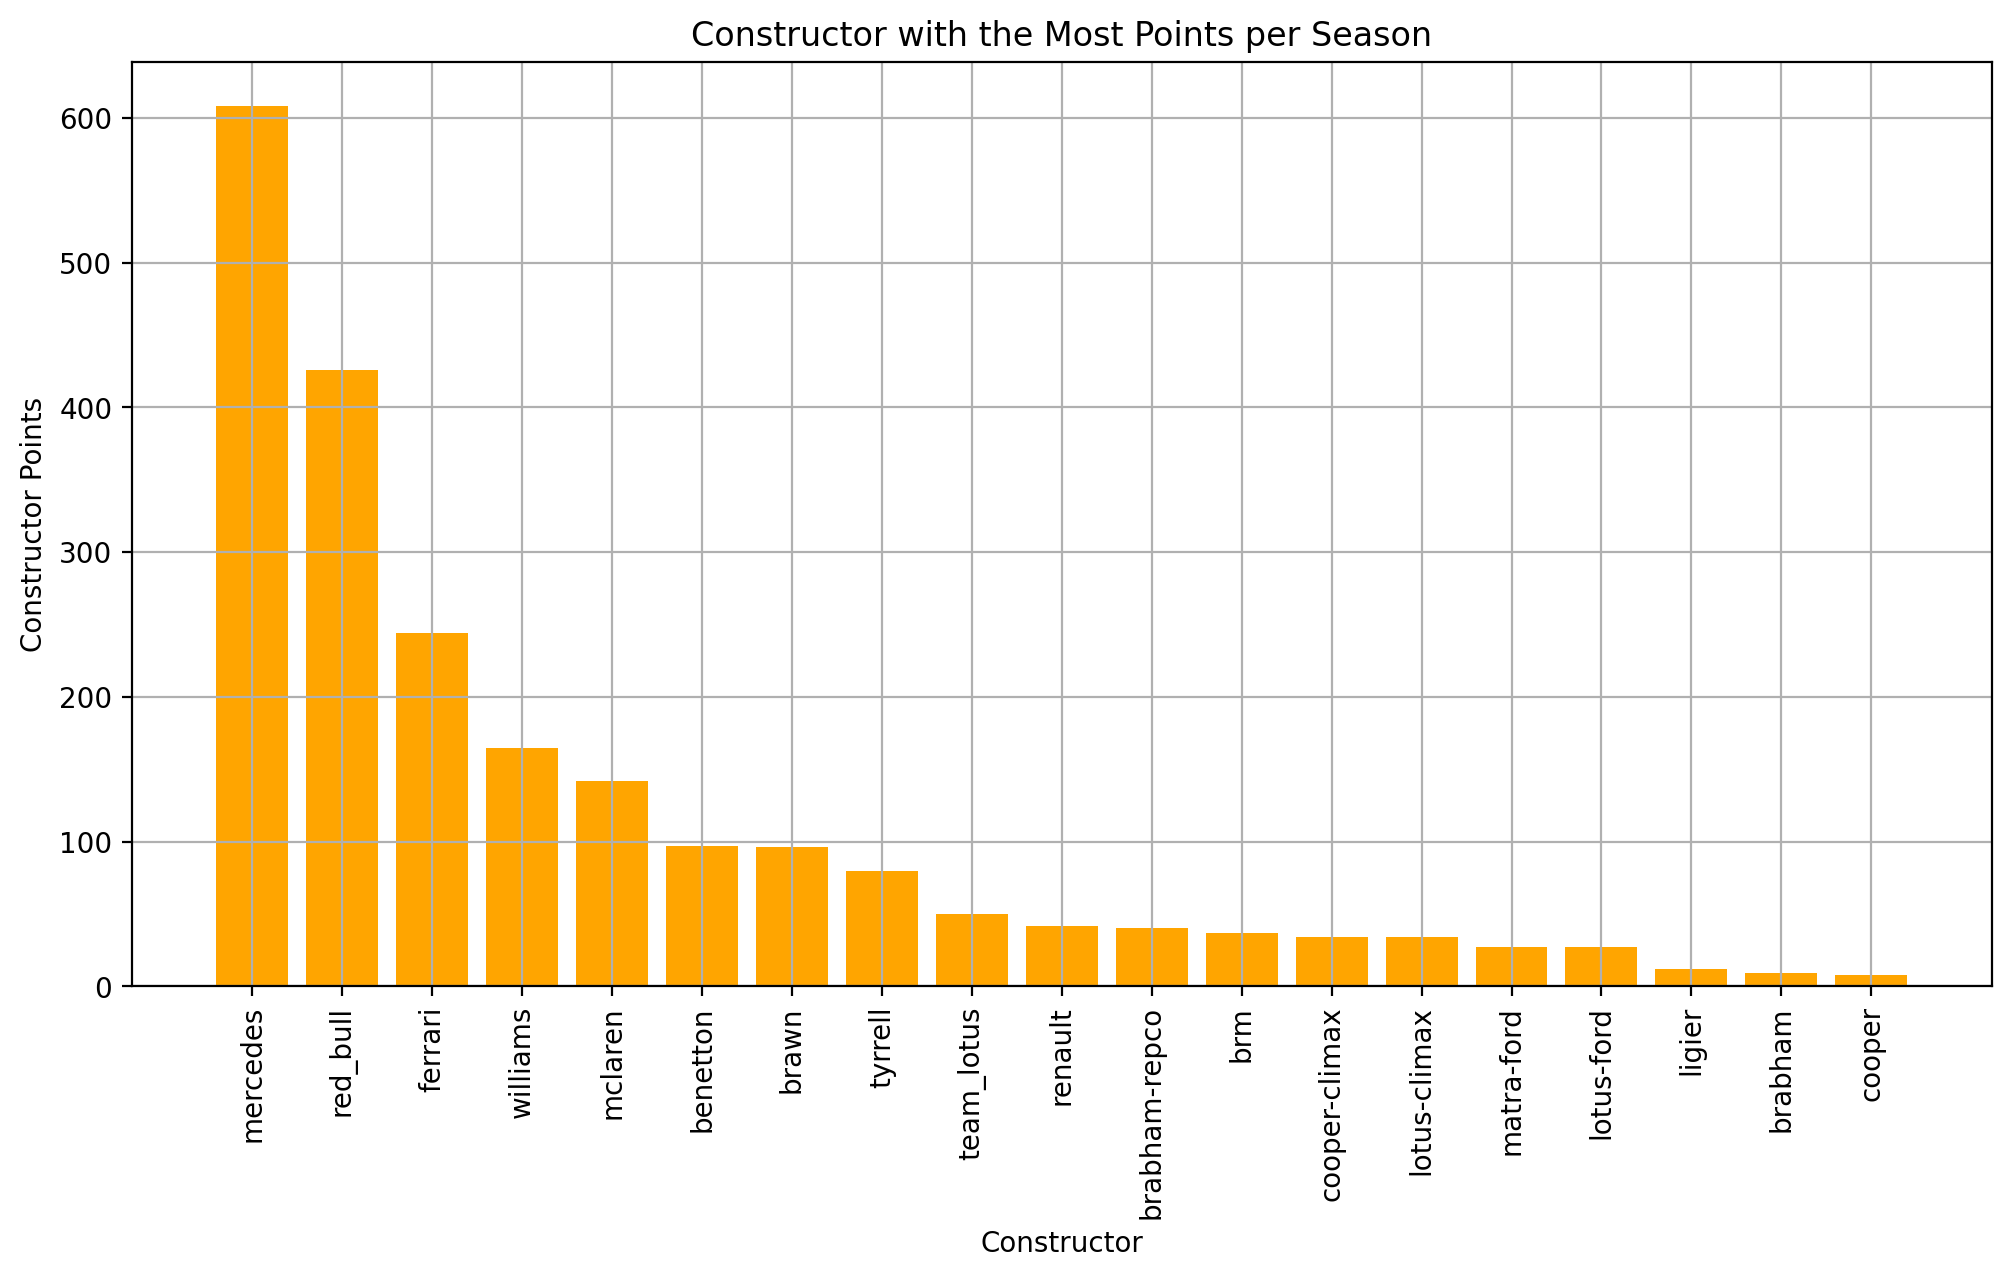

In [19]:
plt.figure(figsize=(12, 6), dpi=200)
plt.bar(most_constructor_points_per_season['constructor'], most_constructor_points_per_season['constructor_points'], color='orange')
plt.xlabel('Constructor')
plt.ylabel('Constructor Points')
plt.title('Constructor with the Most Points per Season')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Constructor points distrubution**

In [20]:
constructor_points_aggregated = constructor_standings.groupby('constructor')['constructor_points'].sum().reset_index()
constructor_points_aggregated['percentage'] = (constructor_points_aggregated['constructor_points'] / constructor_points_aggregated['constructor_points'].sum()) * 100

threshold = 2
others_percentage = constructor_points_aggregated[constructor_points_aggregated['percentage'] < threshold]['percentage'].sum()
others = pd.DataFrame({'constructor': ['others'], 'percentage': [others_percentage]})
constructor_points_aggregated = pd.concat([constructor_points_aggregated[constructor_points_aggregated['percentage'] >= threshold], others], ignore_index=True)

constructor_points_aggregated

,constructor,constructor_points,percentage
0,ferrari,69950.0,21.444886
1,force_india,9308.0,2.853595
2,lotus_f1,6779.0,2.078268
3,mclaren,43467.0,13.325873
4,mercedes,48709.0,14.932937
5,red_bull,41043.0,12.582737
6,renault,14130.0,4.331898
7,team_lotus,6834.0,2.095130
8,williams,27681.0,8.486288
9,others,NaN,17.868388


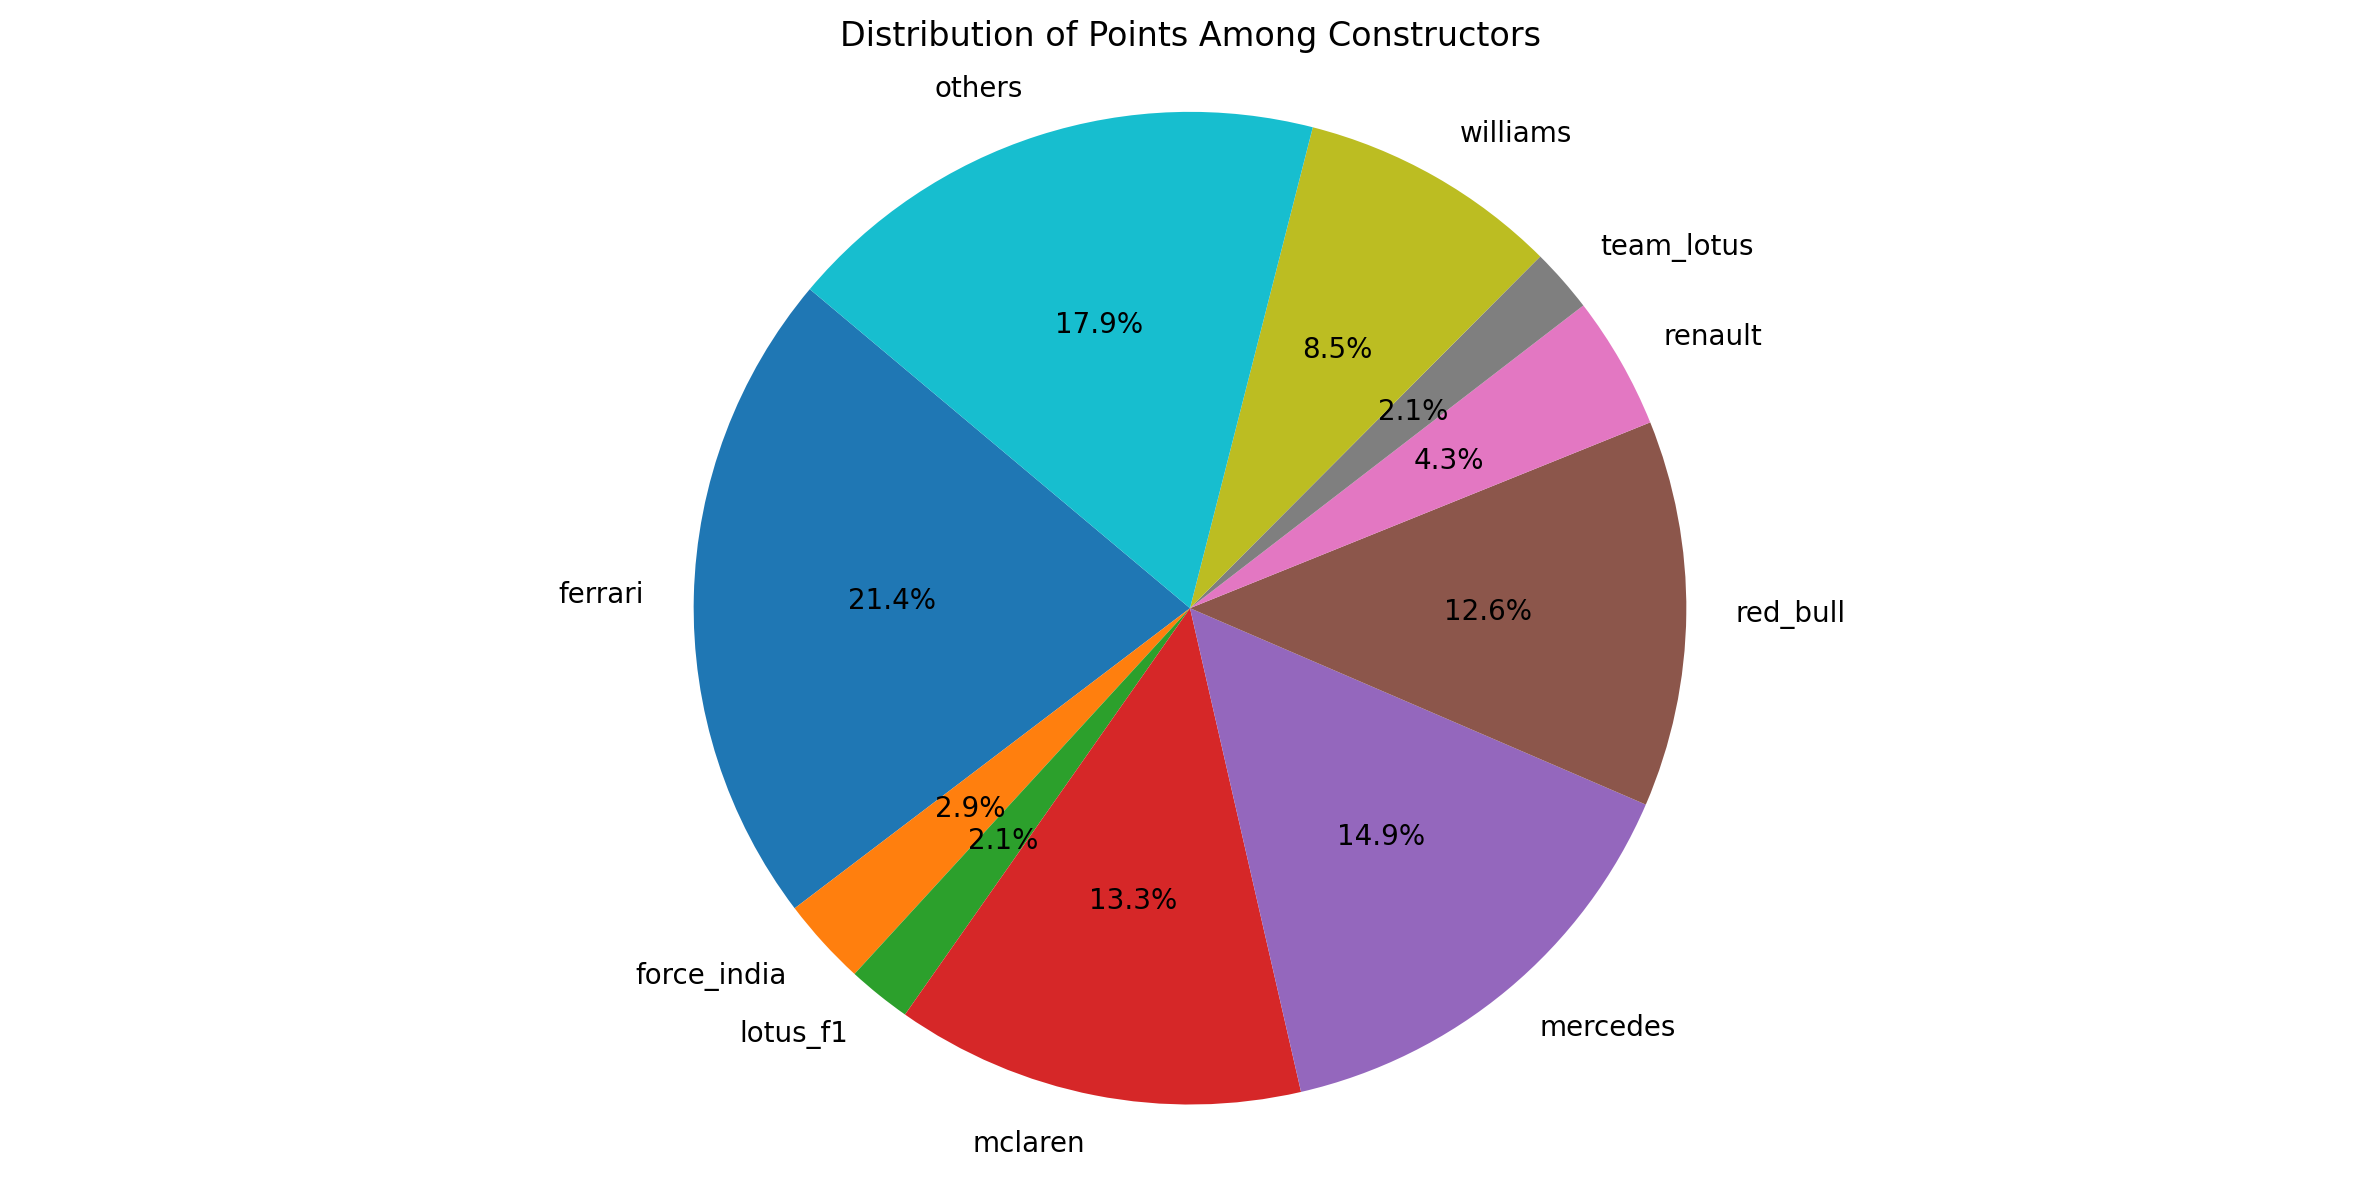

In [21]:
plt.figure(figsize=(12, 6), dpi=200)
plt.pie(constructor_points_aggregated['percentage'], labels=constructor_points_aggregated['constructor'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Points Among Constructors')
plt.tight_layout()
plt.show()

**Constructor with most wins and least wins**

Constructor with the most wins: ferrari with 1643.0 wins
Constructor with the least wins: ags with 0.0 wins


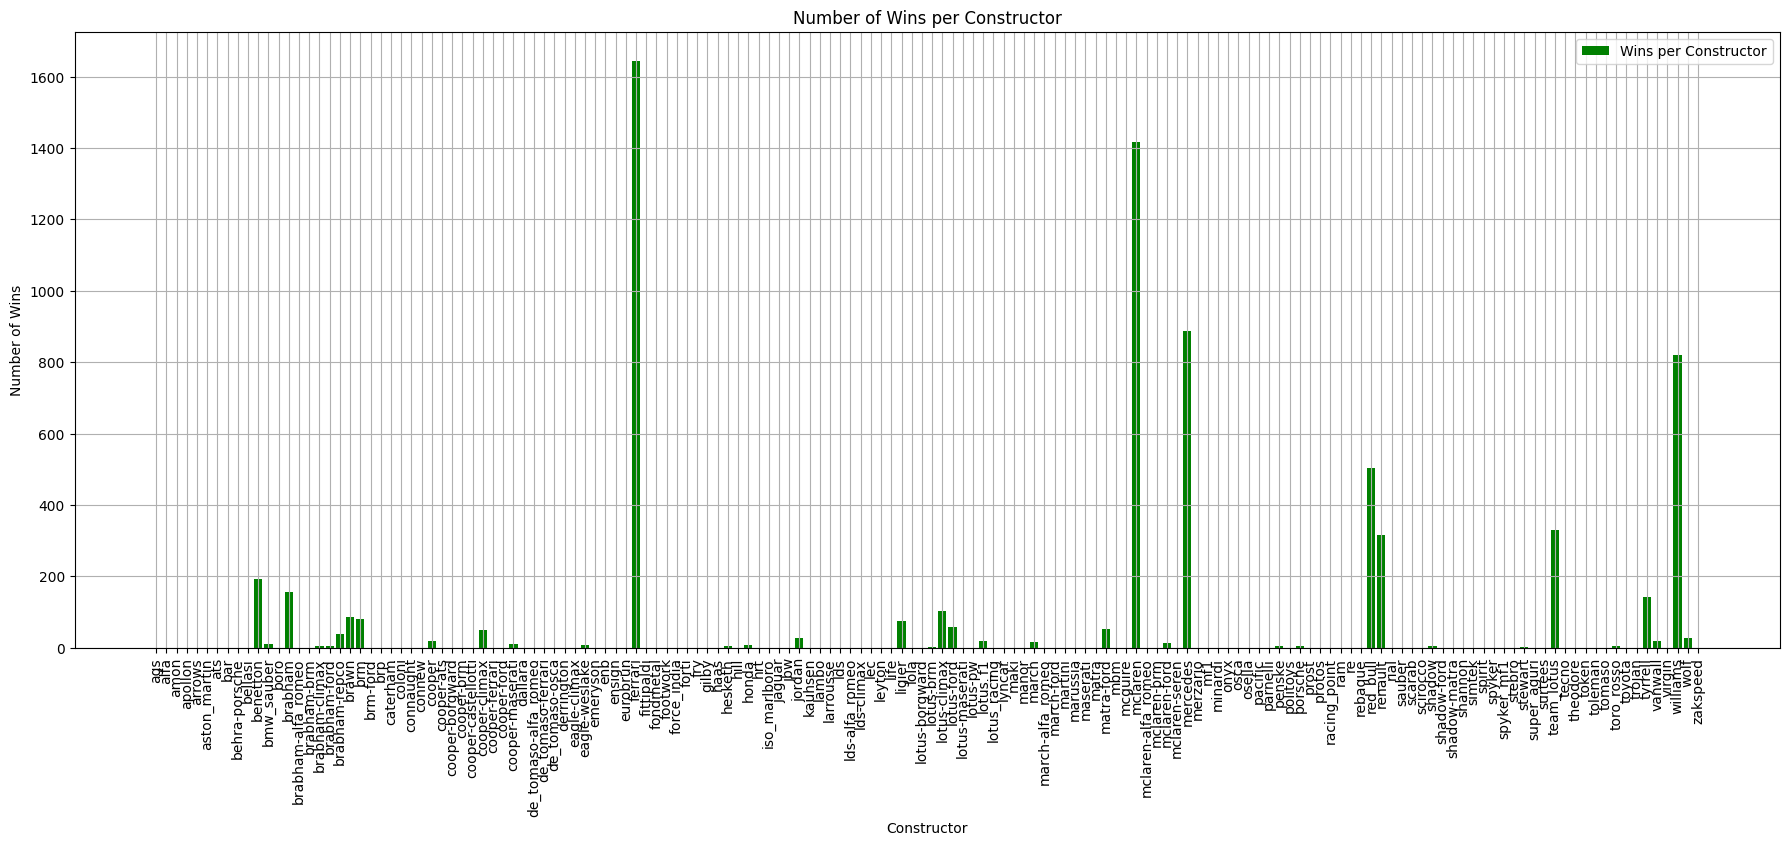

In [22]:
wins_per_constructor = top_standing_positions.groupby('constructor')['constructor_wins'].sum().reset_index()
most_wins_constructor = wins_per_constructor.loc[wins_per_constructor['constructor_wins'].idxmax()]
least_wins_constructor = wins_per_constructor.loc[wins_per_constructor['constructor_wins'].idxmin()]

print("Constructor with the most wins:", most_wins_constructor['constructor'], "with", most_wins_constructor['constructor_wins'], "wins")
print("Constructor with the least wins:", least_wins_constructor['constructor'], "with", least_wins_constructor['constructor_wins'], "wins")

plt.figure(figsize=(22, 8))
plt.bar(wins_per_constructor['constructor'], wins_per_constructor['constructor_wins'], color='green', label='Wins per Constructor')
plt.xlabel('Constructor')
plt.ylabel('Number of Wins')
plt.title('Number of Wins per Constructor')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [23]:
print(weather.shape)
weather.head()

(1018, 9)


,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1950,1,silverstone,"Sunny, Mild, Dry",0,0,1,0,0
1,1950,2,monaco,Soleggiato,1,0,0,0,0
2,1950,3,indianapolis,Rainy,0,0,0,1,0
3,1950,4,bremgarten,"Warm, dry and sunny",1,0,1,0,0
4,1950,5,spa,"Warm, dry and sunny",1,0,1,0,0


**frequency of weather condition (warm, cold, dry, wet, cloudy) occurs across all seasons**

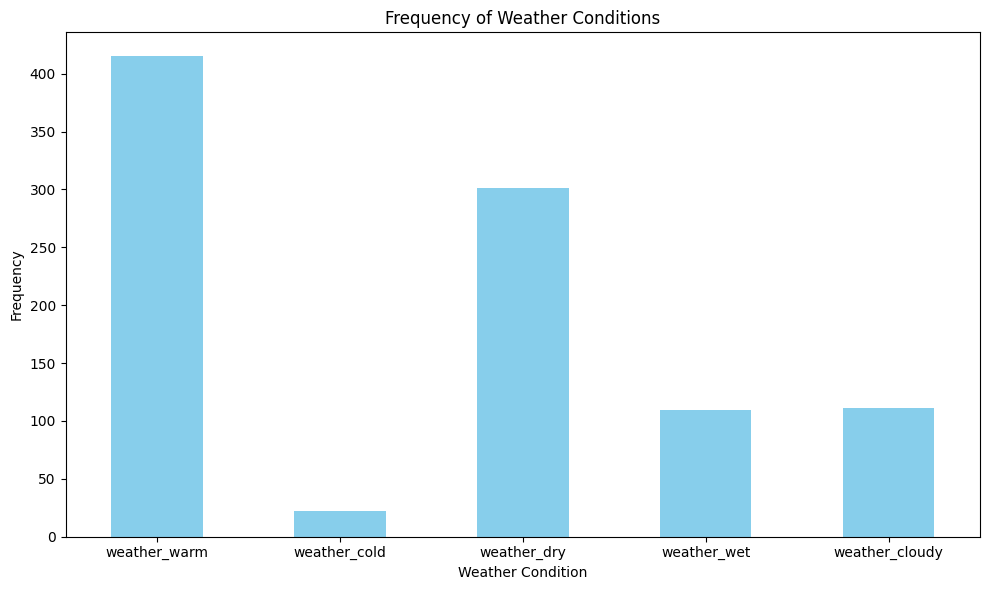

In [24]:
weather_freq = weather[['weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy']].sum()

plt.figure(figsize=(10, 6))
weather_freq.plot(kind='bar', color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Conditions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [25]:
weather_counts = weather.groupby('circuit_id')[['weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy']].sum()
weather_counts['most_frequent_weather'] = weather_counts.idxmax(axis=1)

weather_counts

,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,most_frequent_weather
circuit_id,,,,,,
BAK,2,0,0,0,1,weather_warm
adelaide,7,1,0,1,2,weather_warm
ain-diab,1,0,0,0,0,weather_warm
aintree,1,0,1,0,0,weather_warm
albert_park,11,0,5,2,3,weather_warm
...,...,...,...,...,...,...
yas_marina,6,0,2,0,1,weather_warm
yeongam,1,0,0,1,1,weather_warm
zandvoort,8,0,11,3,5,weather_dry


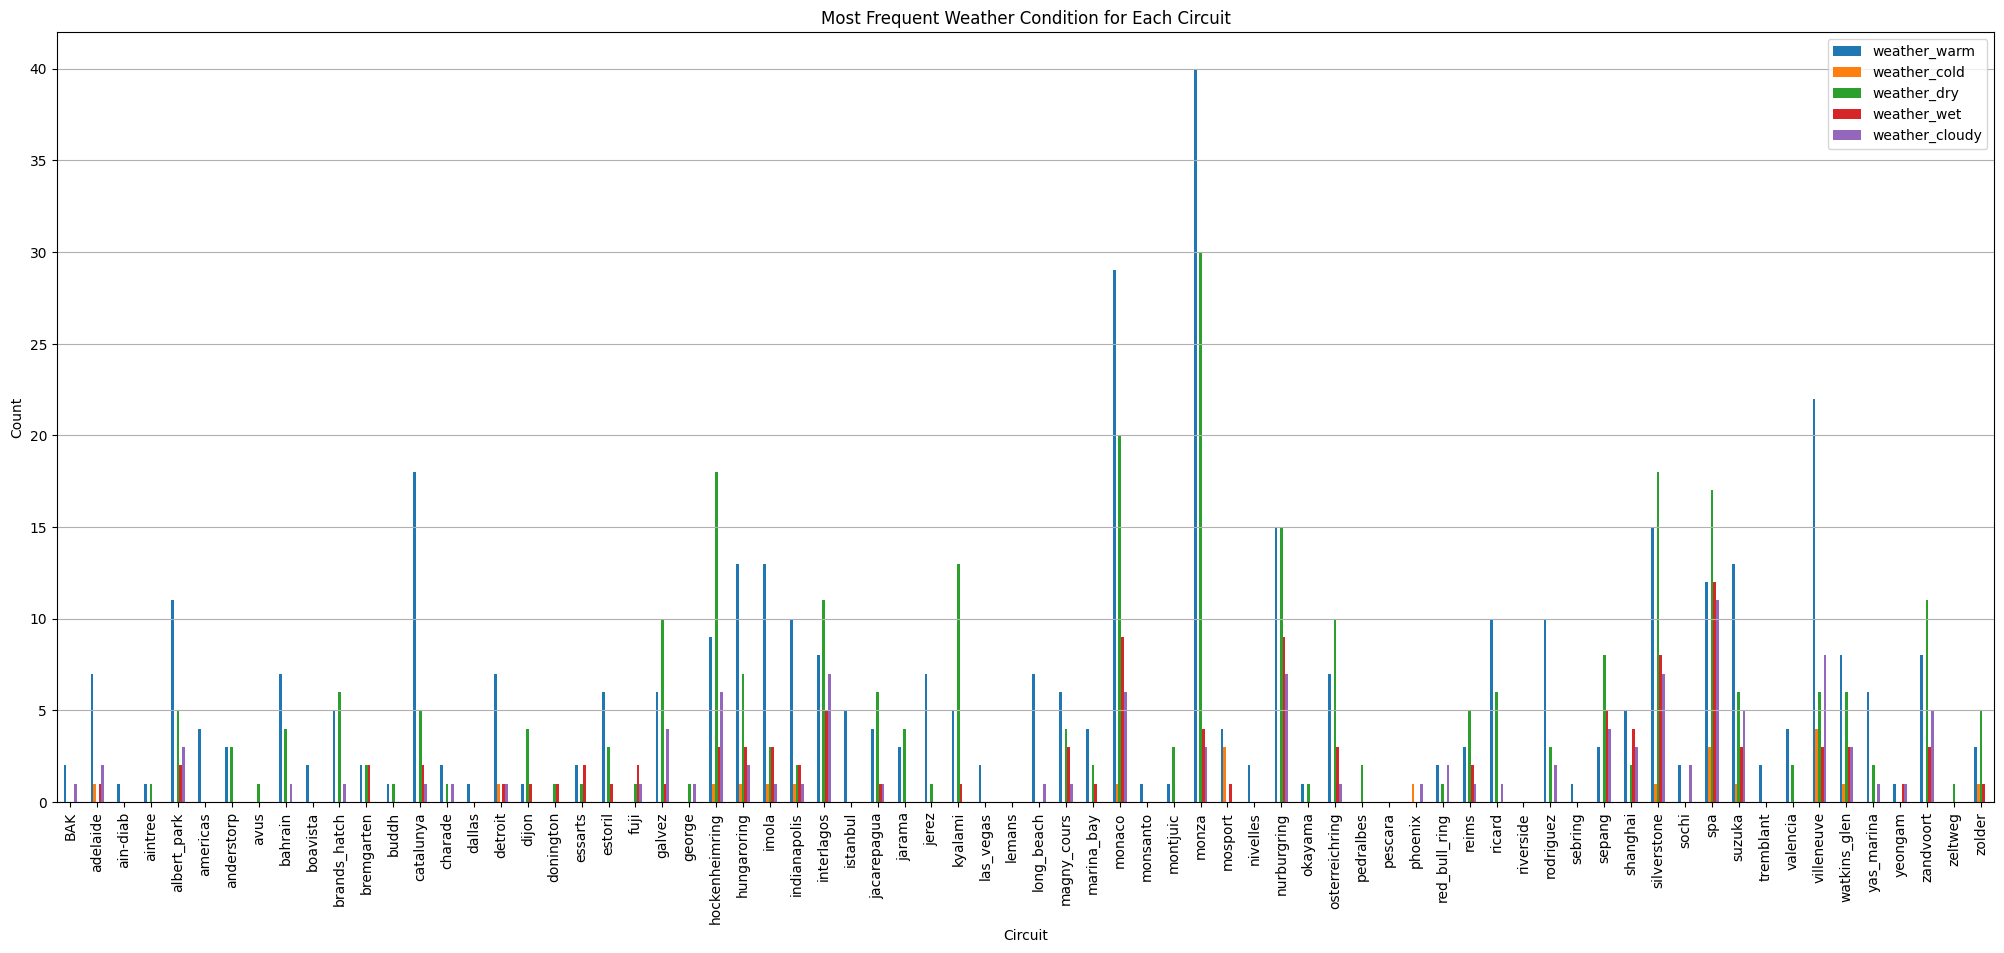

In [26]:
weather_counts.plot(kind='bar', figsize=(25, 10))
plt.xlabel('Circuit')
plt.ylabel('Count')
plt.title('Most Frequent Weather Condition for Each Circuit')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

**The circuit used most according to the weather condition**

In [27]:
weather_counts = weather.groupby('circuit_id')[['weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy']].sum()
most_used_circuit = weather_counts.idxmax()


most_warm_count = weather_counts.loc['monza', 'weather_warm']
most_cold_count = weather_counts.loc['villeneuve', 'weather_cold']
most_dry_count = weather_counts.loc["monza", "weather_dry"]
most_wet_count = weather_counts.loc["spa", "weather_wet"]
most_cloudy_count = weather_counts.loc["spa", "weather_cloudy"]

print("Most used circuit under each weather condition:")

print(f"Number of times a circuit was used when weather was warm:\nCircuit Name: {most_used_circuit['weather_warm']} \nCounts:{most_warm_count}")
print(f"Number of times a circuit was used when weather was cold:\nCircuit Name: {most_used_circuit['weather_cold']} \nCounts:{most_cold_count}")
print(f"Number of times a circuit was used when weather was dry:\nCircuit Name: {most_used_circuit['weather_dry']} \nCounts:{most_dry_count}")
print(f"Number of times a circuit was used when weather was wet:\nCircuit Name: {most_used_circuit['weather_wet']} \nCounts:{most_wet_count}")
print(f"Number of times a circuit was used when weather was cloudy:\nCircuit Name: {most_used_circuit['weather_cloudy']} \nCounts:{most_cloudy_count}")


Most used circuit under each weather condition:
Number of times a circuit was used when weather was warm:
Circuit Name: monza 
Counts:40
Number of times a circuit was used when weather was cold:
Circuit Name: villeneuve 
Counts:4
Number of times a circuit was used when weather was dry:
Circuit Name: monza 
Counts:30
Number of times a circuit was used when weather was wet:
Circuit Name: spa 
Counts:12
Number of times a circuit was used when weather was cloudy:
Circuit Name: spa 
Counts:11


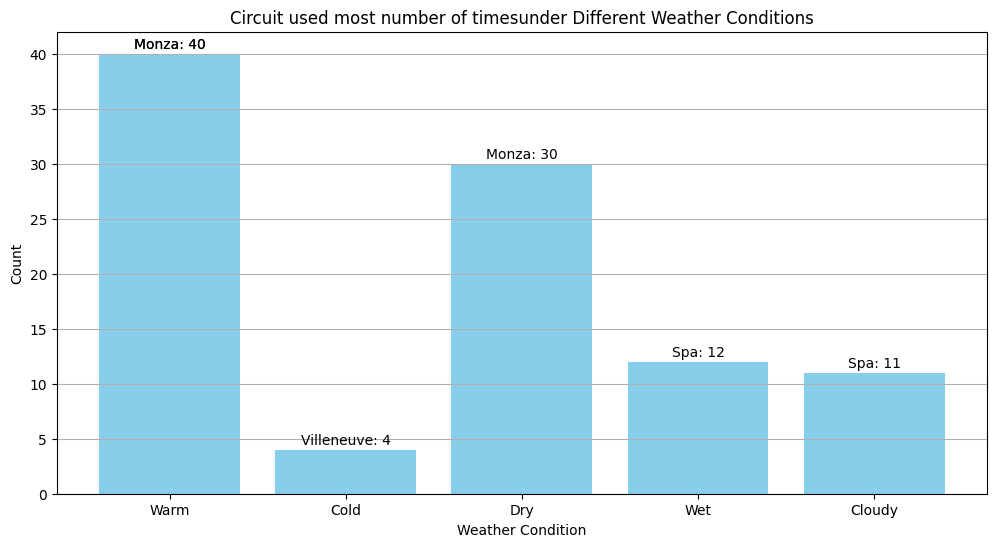

In [28]:
plt.figure(figsize=(12, 6))
plt.bar(['Warm', 'Cold', 'Dry', 'Wet', 'Cloudy'], [most_warm_count, most_cold_count, most_dry_count, most_wet_count, most_cloudy_count], color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Circuit used most number of timesunder Different Weather Conditions')
plt.text(0, most_warm_count + 0.5, f'Monza: {most_warm_count}', ha='center')
plt.text(0, most_warm_count + 0.5, f'Monza: {most_warm_count}', ha='center')
plt.text(1, most_cold_count + 0.5, f'Villeneuve: {most_cold_count}', ha='center')
plt.text(2, most_dry_count + 0.5, f'Monza: {most_dry_count}', ha='center')
plt.text(3, most_wet_count + 0.5, f'Spa: {most_wet_count}', ha='center')
plt.text(4, most_cloudy_count + 0.5, f'Spa: {most_cloudy_count}', ha='center')
plt.grid(axis='y')
plt.show()

**Most popular Circuits over the years**

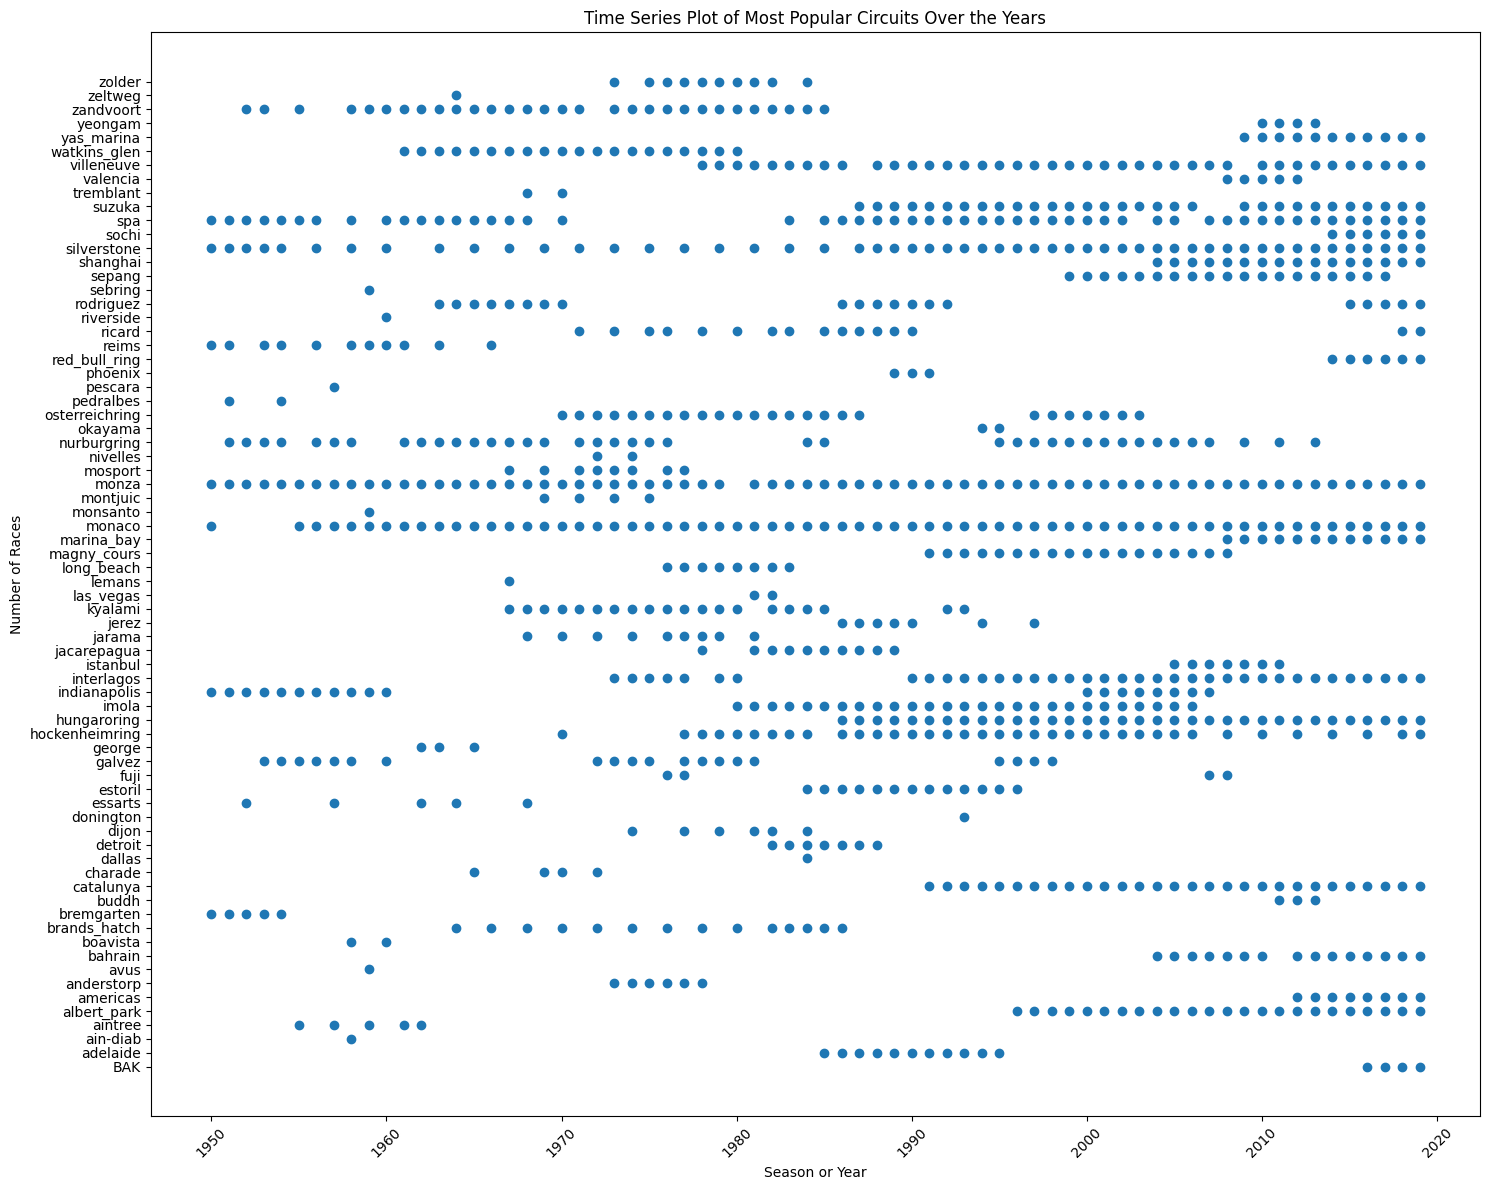

In [29]:

weather_sorted = weather.sort_values(by='circuit_id', ascending=True)

plt.figure(figsize=(15, 12))
plt.scatter(weather_sorted['season'], weather_sorted['circuit_id'], marker='o')
plt.xlabel('Season or Year')
plt.ylabel('Number of Races')
plt.title('Time Series Plot of Most Popular Circuits Over the Years')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**TOP 5 most famous and least famous circuits**

In [30]:
popular_circuits = weather.groupby('circuit_id').size().reset_index(name='num_races')
popular_circuits_sorted = popular_circuits.sort_values(by='num_races', ascending=False)
top_5_popular_circuits = popular_circuits_sorted.head(5)

print("Top 5 Popular Circuits:")
print(top_5_popular_circuits)


Top 5 Popular Circuits:
     circuit_id  num_races
42        monza         69
39       monaco         66
59  silverstone         53
61          spa         52
45  nurburgring         40


In [31]:
popular_circuits = weather.groupby('circuit_id').size().reset_index(name='num_races')
popular_circuits_sorted = popular_circuits.sort_values(by='num_races', ascending=True)
top_5_least_popular_circuits = popular_circuits_sorted.head(5)

print("Top 5 least Popular Circuits:")
print(top_5_least_popular_circuits)

Top 5 least Popular Circuits:
   circuit_id  num_races
35     lemans          1
18  donington          1
2    ain-diab          1
70    zeltweg          1
56    sebring          1


**Races held on each circuit**

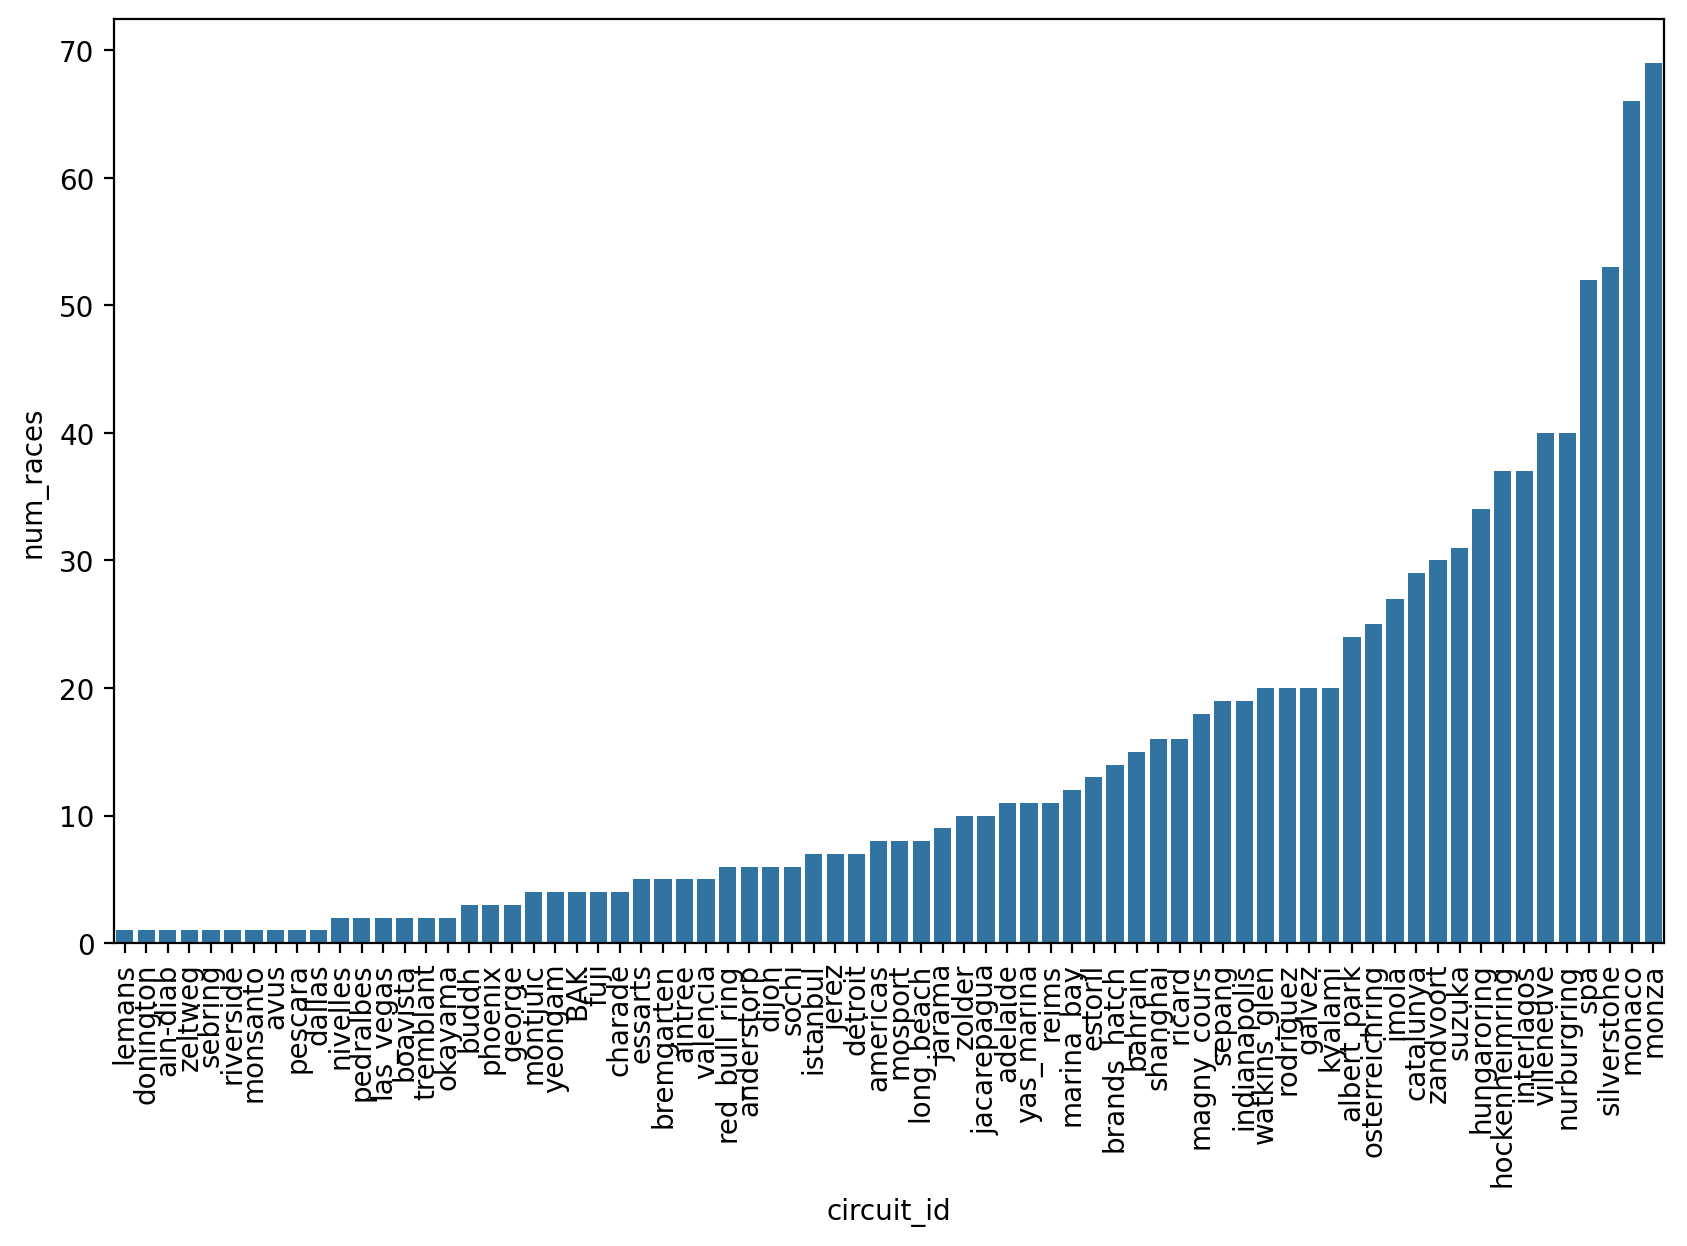

In [32]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=popular_circuits_sorted, x="circuit_id", y="num_races")
plt.xticks(rotation=90);

**Driver Points**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


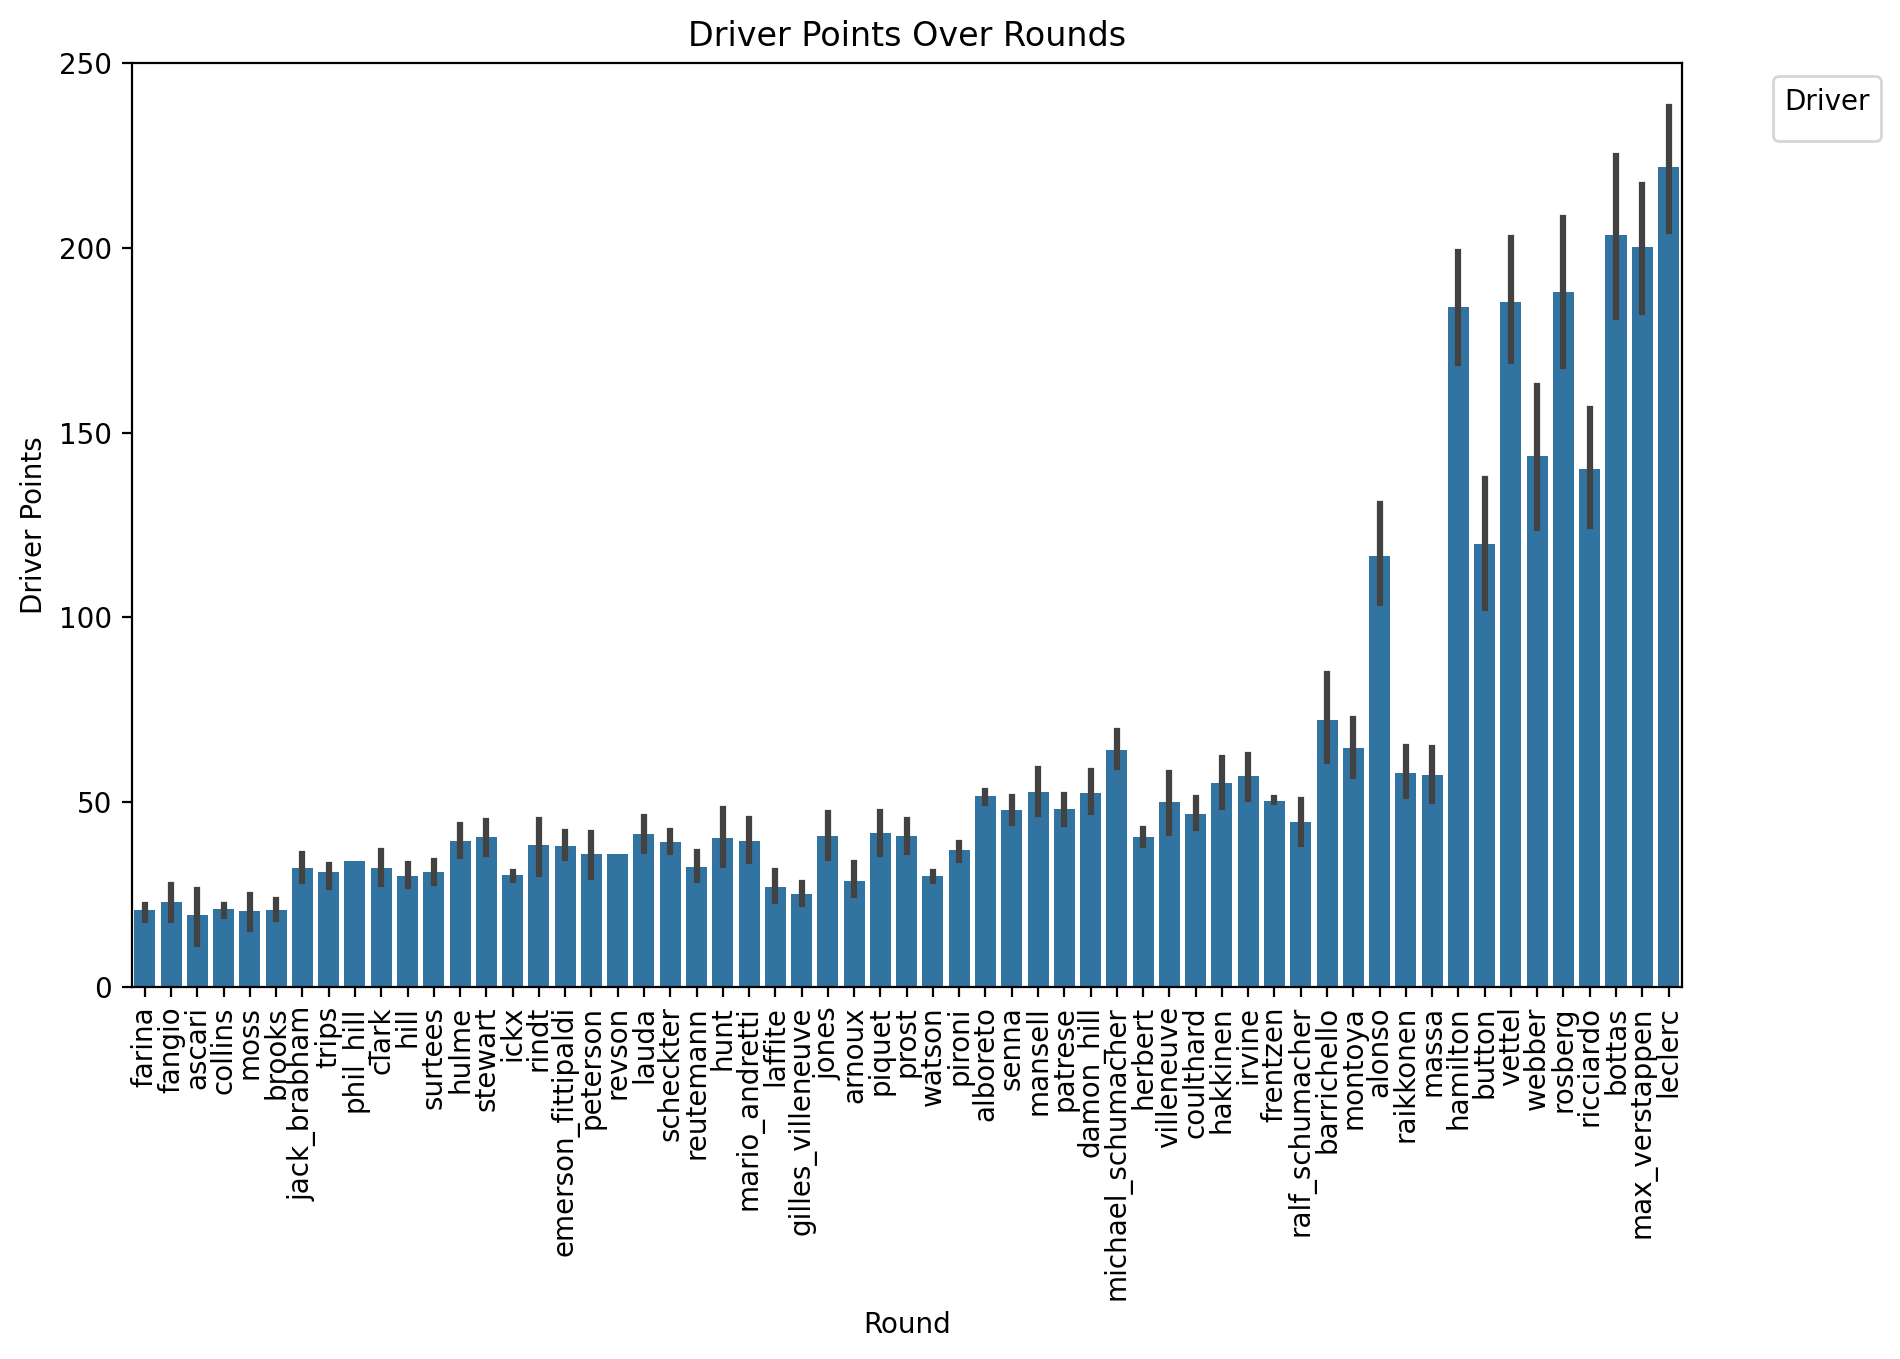

In [33]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(y='driver_points', x='driver', data=driver_standings[driver_standings['driver_wins'] > 1])
plt.xlabel('Round')
plt.ylabel('Driver Points')
plt.title('Driver Points Over Rounds')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [34]:
races.head()

,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


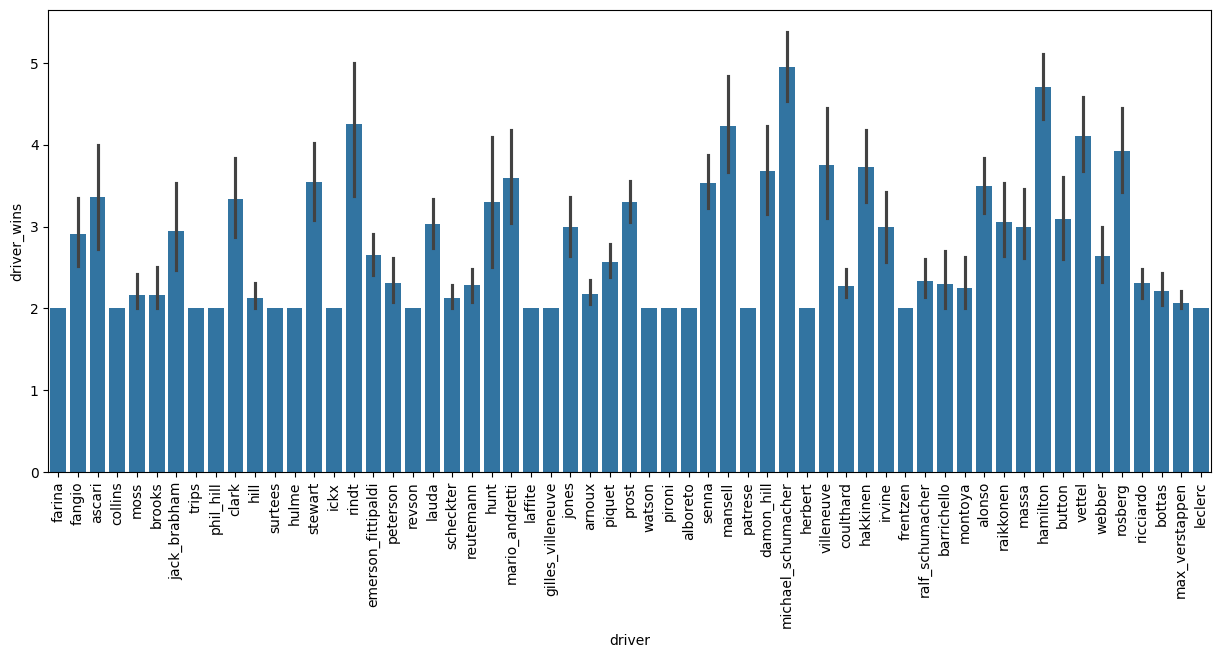

In [35]:
plt.figure(figsize=(15, 6)) 
sns.barplot(data=driver_standings[driver_standings['driver_wins'] > 1], x="driver", y="driver_wins")
plt.xticks(rotation=90)
plt.show()

In [36]:
qualifying.head()

,grid,driver_name,car,qualifying_time,season,round
0,1,Keke Rosberg ROS,Williams Honda,1:34.526,1983,1
1,2,Alain Prost PRO,Renault,1:34.672,1983,1
2,3,Patrick Tambay TAM,Ferrari,1:34.758,1983,1
3,4,Nelson Piquet PIQ,Brabham BMW,1:35.114,1983,1
4,5,Derek Warwick WAR,Toleman Hart,1:35.206,1983,1


**Drivers with number of race participations**

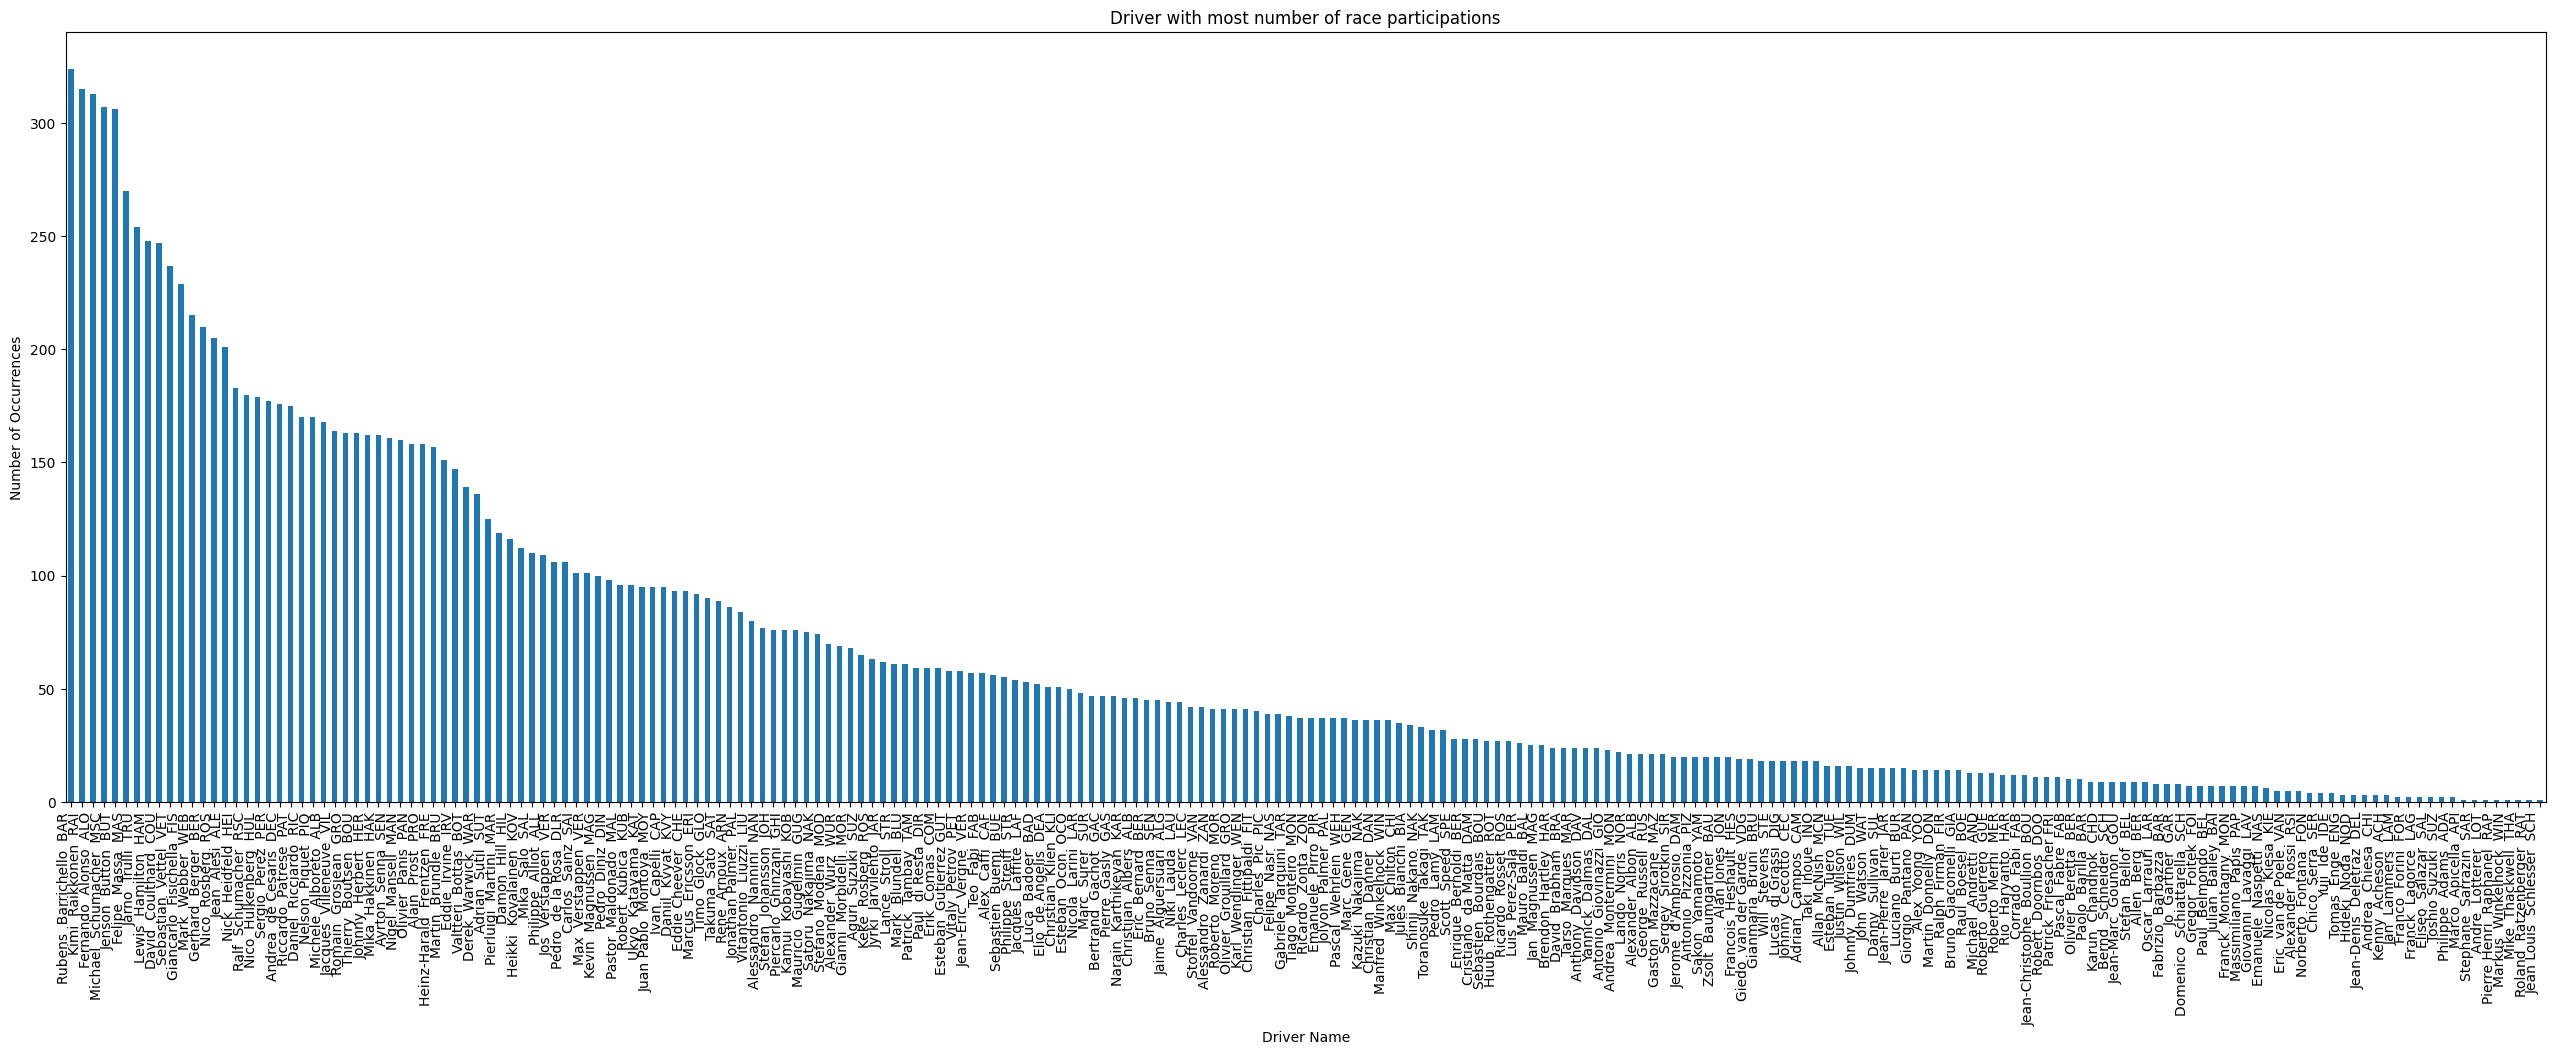

In [37]:
driver_counts = qualifying['driver_name'].value_counts()

plt.figure(figsize=(32, 10))
driver_counts.plot(kind='bar')
plt.title('Driver with most number of race participations')
plt.xlabel('Driver Name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90, ha='right')
plt.show()


**Numer of entries exist for each season**

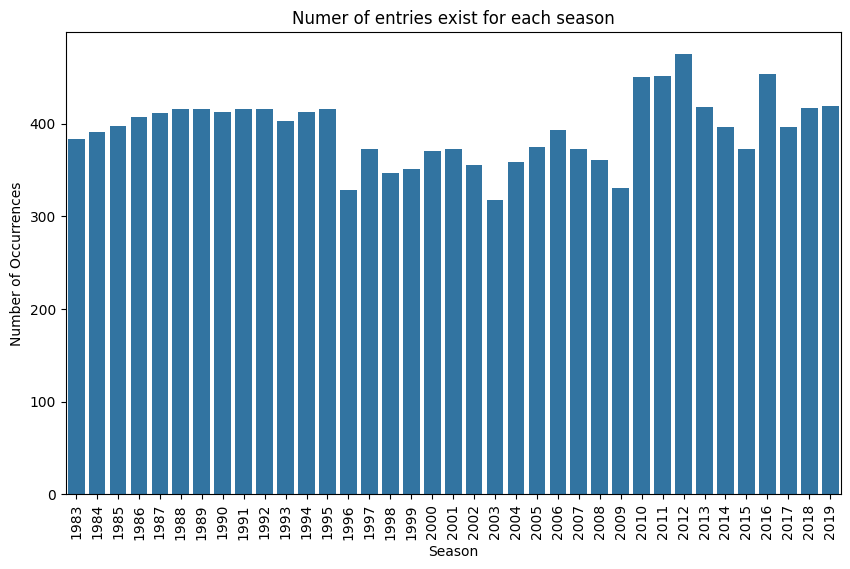

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=qualifying, x='season')
plt.title('Numer of entries exist for each season')
plt.xlabel('Season')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()

**Car with most number of appearance**

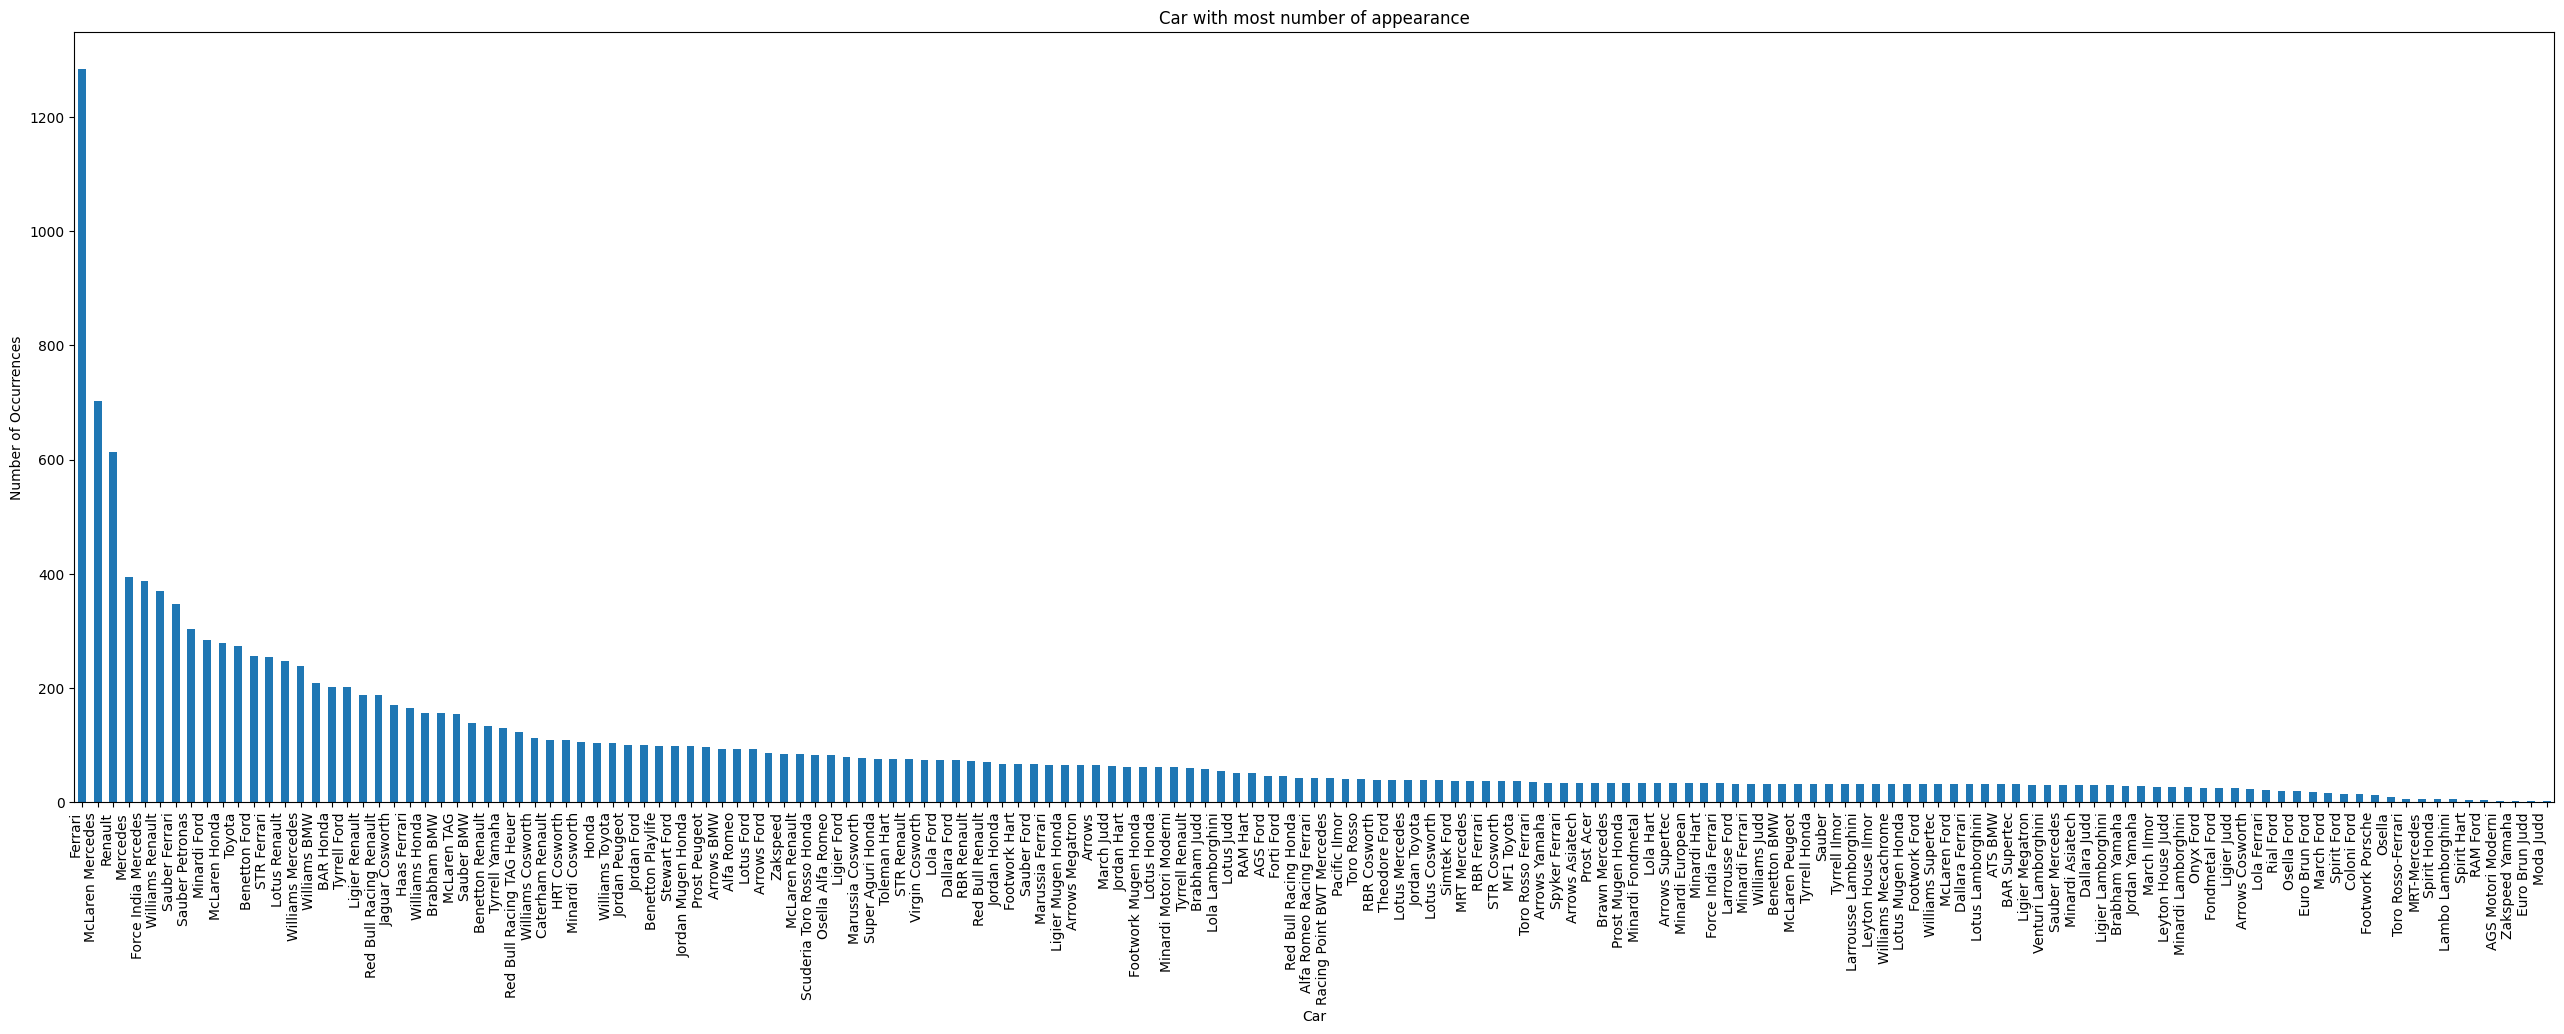

In [39]:
car_counts = qualifying['car'].value_counts()
plt.figure(figsize=(32,10))
car_counts.plot(kind='bar')
plt.title('Car with most number of appearance')
plt.xlabel('Car')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90, ha='right')
plt.show()

In [40]:
results.head()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,url
0,1950,1,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,1,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2,http://en.wikipedia.org/wiki/1950_British_Gran...
2,1950,1,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3,http://en.wikipedia.org/wiki/1950_British_Gran...
3,1950,1,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4,http://en.wikipedia.org/wiki/1950_British_Gran...
4,1950,1,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5,http://en.wikipedia.org/wiki/1950_British_Gran...


**Drivers with podium wins**

In [41]:
podium_counts = results[results['podium'] <= 3].groupby('driver').size().reset_index(name='podium_count')
podium_counts = podium_counts.sort_values(by='podium_count', ascending=False)
print("Drivers with the most number of podiums:")
podium_counts.head()

Drivers with the most number of podiums:


,driver,podium_count
125,michael_schumacher,155
79,hamilton,151
199,vettel,120
153,prost,106
155,raikkonen,103


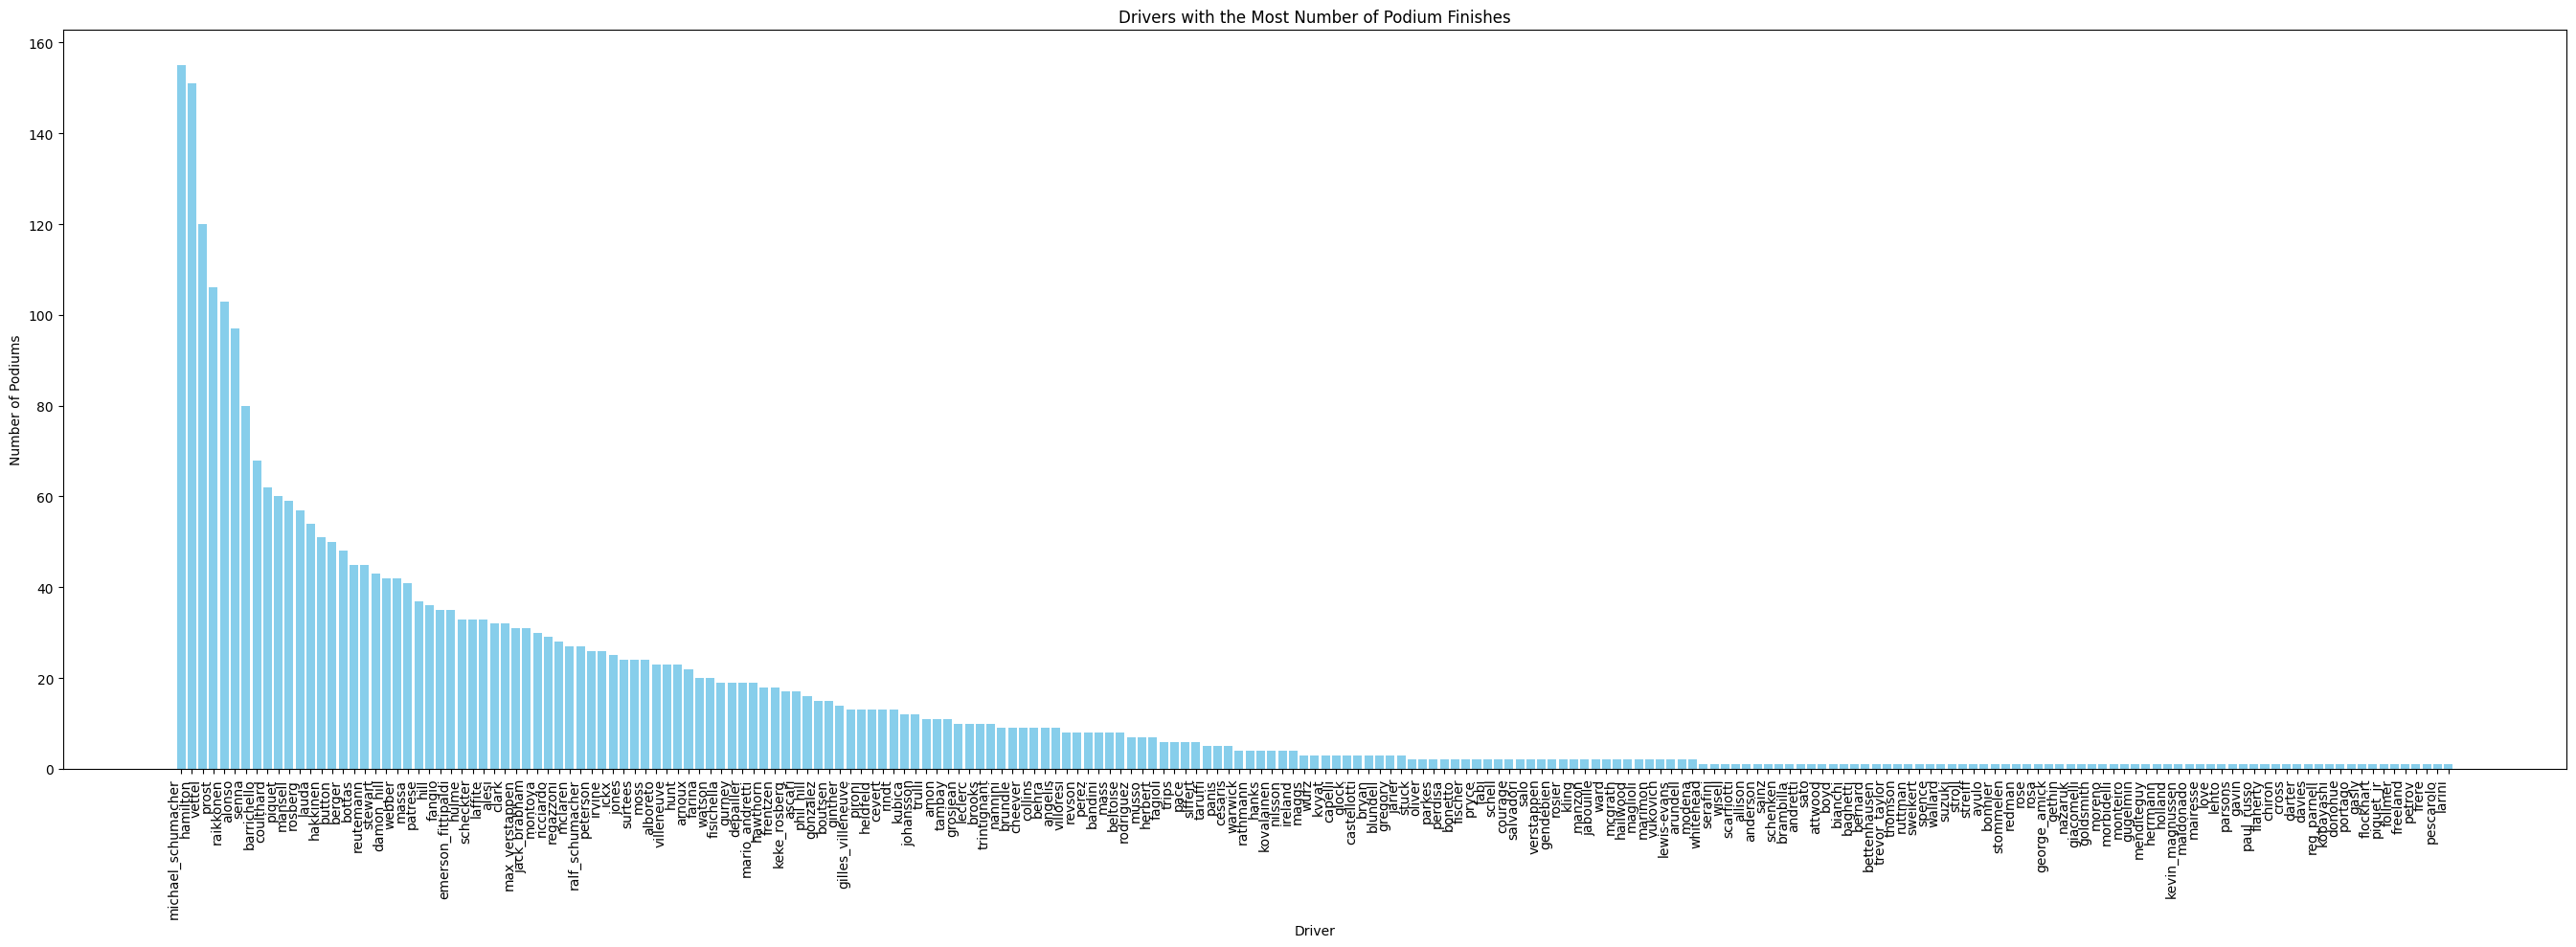

In [42]:
plt.figure(figsize=(27, 10))
plt.bar(podium_counts['driver'], podium_counts['podium_count'], color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Number of Podiums')
plt.title('Drivers with the Most Number of Podium Finishes')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Age of Drivers with the Most Number of Podiums**

In [43]:
podium_counts = results[results['podium'] <= 3].groupby('driver').size().reset_index(name='podium_count')
top_drivers = podium_counts.sort_values(by='podium_count', ascending=False).head(5)

results['date_of_birth'] = pd.to_datetime(results['date_of_birth'])
results['age_at_podium'] = results['season'] - results['date_of_birth'].dt.year


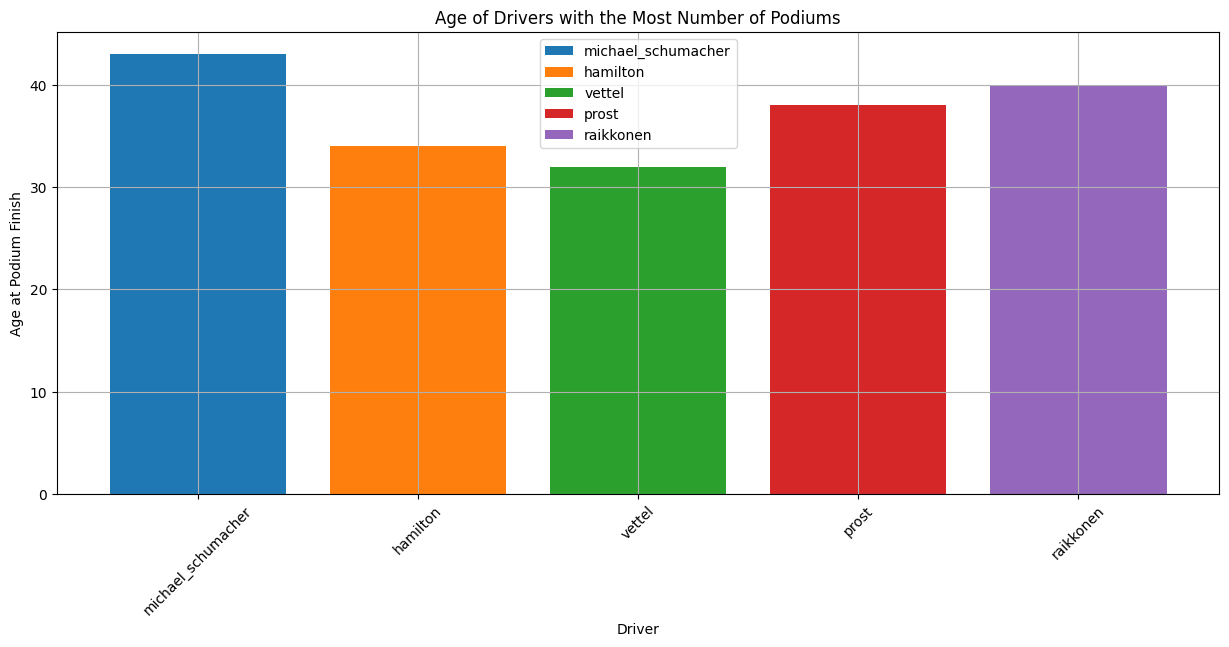

In [44]:
plt.figure(figsize=(15, 6))
for driver in top_drivers['driver']:
    driver_data = results[results['driver'] == driver]
    plt.bar(driver_data['driver'], driver_data['age_at_podium'], label=driver)
plt.xlabel('Driver')
plt.ylabel('Age at Podium Finish')
plt.title('Age of Drivers with the Most Number of Podiums')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [45]:
df1 = pd.merge(races, weather, how='inner', on=['season', 'round', 'circuit_id']).drop(['lat', 'long','country','weather'], axis = 1)


In [46]:
df2 = pd.merge(df1, results, how='inner', on=['season', 'round', 'circuit_id', 'url']).drop(['url','points', 'status', 'time','age_at_podium'], axis = 1)


In [47]:
df3 = pd.merge(df2, driver_standings, how='left', on=['season', 'round', 'driver']) 

In [48]:
df4 = pd.merge(df3, constructor_standings, how='left', on=['season', 'round', 'constructor']) #from 1958

In [49]:
final_df = pd.merge(df4, qualifying, how='inner', on=['season', 'round', 'grid']).drop(['driver_name', 'car'], axis = 1) #from 1983
print(final_df.columns)

Index(['season', 'round', 'circuit_id', 'date', 'weather_warm', 'weather_cold',
       'weather_dry', 'weather_wet', 'weather_cloudy', 'driver',
       'date_of_birth', 'nationality', 'constructor', 'grid', 'podium',
       'driver_points', 'driver_wins', 'driver_standings_pos',
       'constructor_points', 'constructor_wins', 'constructor_standings_pos',
       'qualifying_time'],
      dtype='object')


In [50]:
final_df.head()

,season,round,circuit_id,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,...,constructor,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time
0,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,piquet,...,brabham,4,1,0.0,0.0,0.0,0.0,0.0,0.0,1:35.114
1,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,lauda,...,mclaren,9,2,0.0,0.0,0.0,0.0,0.0,0.0,1:36.054
2,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,laffite,...,williams,18,3,0.0,0.0,0.0,0.0,0.0,0.0,1:38.234
3,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,tambay,...,ferrari,3,4,0.0,0.0,0.0,0.0,0.0,0.0,1:34.758
4,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,surer,...,arrows,20,5,0.0,0.0,0.0,0.0,0.0,0.0,1:38.468


In [51]:
from dateutil.relativedelta import *

final_df['date'] = pd.to_datetime(final_df.date)
final_df['date_of_birth'] = pd.to_datetime(final_df.date_of_birth)
final_df['driver_age'] = final_df.apply(lambda x: relativedelta(x['date'], x['date_of_birth']).years, axis=1)
final_df.drop(['date', 'date_of_birth'], axis = 1, inplace = True)

In [52]:
for col in ['driver_points', 'driver_wins', 'driver_standings_pos', 'constructor_points', 
            'constructor_wins' , 'constructor_standings_pos']:
    final_df[col].fillna(0, inplace = True)
    final_df[col] = final_df[col].map(lambda x: int(x))
    
final_df.dropna(inplace = True )

C:\Users\ramsh\AppData\Local\Temp\ipykernel_4376\1605302678.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[col].fillna(0, inplace = True)


In [53]:
for col in ['weather_warm', 'weather_cold','weather_dry', 'weather_wet', 'weather_cloudy']:
    final_df[col] = final_df[col].map(lambda x: bool(x))


In [54]:
final_df['qualifying_time'] = final_df.qualifying_time.map(lambda x: 0 if str(x) == '00.000' 
                             else(float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0])) if x != 0 else 0))
final_df = final_df[final_df['qualifying_time'] != 0]
final_df.sort_values(['season', 'round', 'grid'], inplace = True)
final_df['qualifying_time_diff'] = final_df.groupby(['season', 'round']).qualifying_time.diff()
final_df['qualifying_time'] = final_df.groupby(['season', 'round']).qualifying_time_diff.cumsum().fillna(0)
final_df.drop('qualifying_time_diff', axis = 1, inplace = True)


In [55]:
final_df.columns

Index(['season', 'round', 'circuit_id', 'weather_warm', 'weather_cold',
       'weather_dry', 'weather_wet', 'weather_cloudy', 'driver', 'nationality',
       'constructor', 'grid', 'podium', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qualifying_time', 'driver_age'],
      dtype='object')

In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14273 entries, 14 to 14520
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     14273 non-null  int64  
 1   round                      14273 non-null  int64  
 2   circuit_id                 14273 non-null  object 
 3   weather_warm               14273 non-null  bool   
 4   weather_cold               14273 non-null  bool   
 5   weather_dry                14273 non-null  bool   
 6   weather_wet                14273 non-null  bool   
 7   weather_cloudy             14273 non-null  bool   
 8   driver                     14273 non-null  object 
 9   nationality                14273 non-null  object 
 10  constructor                14273 non-null  object 
 11  grid                       14273 non-null  int64  
 12  podium                     14273 non-null  int64  
 13  driver_points              14273 non-null  int64  

In [57]:

season_standings = final_df.groupby('season').agg({
    'driver_standings_pos': min,
    'constructor_standings_pos': min
})

top_driver_standings = season_standings['driver_standings_pos'].sort_values().head(5)
top_constructor_standings = season_standings['constructor_standings_pos'].sort_values().head(5)

print("Top 5 Driver Standings:")
print(top_driver_standings)

print("\nTop 5 Constructor Standings:")
print(top_constructor_standings)


Top 5 Driver Standings:
season
1983    0
2003    0
2004    0
2005    0
2006    0
Name: driver_standings_pos, dtype: int64

Top 5 Constructor Standings:
season
1983    0
2003    0
2004    0
2005    0
2006    0
Name: constructor_standings_pos, dtype: int64


C:\Users\ramsh\AppData\Local\Temp\ipykernel_4376\1949206501.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  season_standings = final_df.groupby('season').agg({


In [58]:
df_dum = pd.get_dummies(final_df, columns = ['circuit_id', 'nationality', 'constructor'] )

for col in df_dum.columns:
    if 'nationality' in col and df_dum[col].sum() < 140:
        df_dum.drop(col, axis = 1, inplace = True)
        
    elif 'constructor' in col and df_dum[col].sum() < 140:
        df_dum.drop(col, axis = 1, inplace = True)
        
    elif 'circuit_id' in col and df_dum[col].sum() < 70:
        df_dum.drop(col, axis = 1, inplace = True)
    
    else:
        pass

In [59]:
df_dum.shape

(14273, 100)

In [60]:
df_dum.to_csv('final_df.csv', index = False)

In [61]:
df_dum.shape

(14273, 100)